In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_1=pd.read_csv('1st_dataset.csv', index_col=0)
data_2=pd.read_csv('2nd_dataset.csv', index_col=0)
data_3=pd.read_csv('3rd_dataset.csv', index_col=0)

In [3]:

# Comparing the datasets
print(data_1.describe())
print(data_2.describe())
print(data_3.describe())

''' datasets 1 and 3 have the same count, mean, standard deviation (std), minimum (min),
    25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) for the columns
   'price', 'discount', and 'Quantity', it indicates that the distributions of these variables
     are the same in both datasets.'''





              price      discount    Quantity
count  10000.000000  10000.000000  10000.0000
mean    2549.020036      0.103464      2.0130
std     1421.439617      0.060972      0.8214
min        1.390840      0.050010      1.0000
25%     1311.545518      0.065612      1.0000
50%     2563.928363      0.081936      2.0000
75%     3768.890121      0.098514      3.0000
max     4999.933084      0.299845      3.0000
              price      discount    Quantity         Sales
count  10000.000000  10000.000000  10000.0000  10000.000000
mean    2552.193936      0.103464      2.0130   2554.206936
std     1419.810247      0.060972      0.8214   1419.808769
min       99.938360      0.050010      1.0000    101.847754
25%     1314.865169      0.065612      1.0000   1316.865169
50%     2565.837514      0.081936      2.0000   2567.342991
75%     3770.929963      0.098514      3.0000   3773.184216
max     4999.933084      0.299845      3.0000   5000.940318
              price      discount    Quantity 

" datasets 1 and 3 have the same count, mean, standard deviation (std), minimum (min),\n    25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) for the columns\n   'price', 'discount', and 'Quantity', it indicates that the distributions of these variables\n     are the same in both datasets."

             price  discount  Quantity     Sales
price     1.000000  0.007575 -0.002089  1.000000
discount  0.007575  1.000000  0.000600  0.007576
Quantity -0.002089  0.000600  1.000000 -0.001511
Sales     1.000000  0.007576 -0.001511  1.000000
             price  discount  Quantity     Sales
price     1.000000   0.00760 -0.002215  0.998482
discount  0.007600   1.00000  0.000600  0.006960
Quantity -0.002215   0.00060  1.000000 -0.001137
Sales     0.998482   0.00696 -0.001137  1.000000


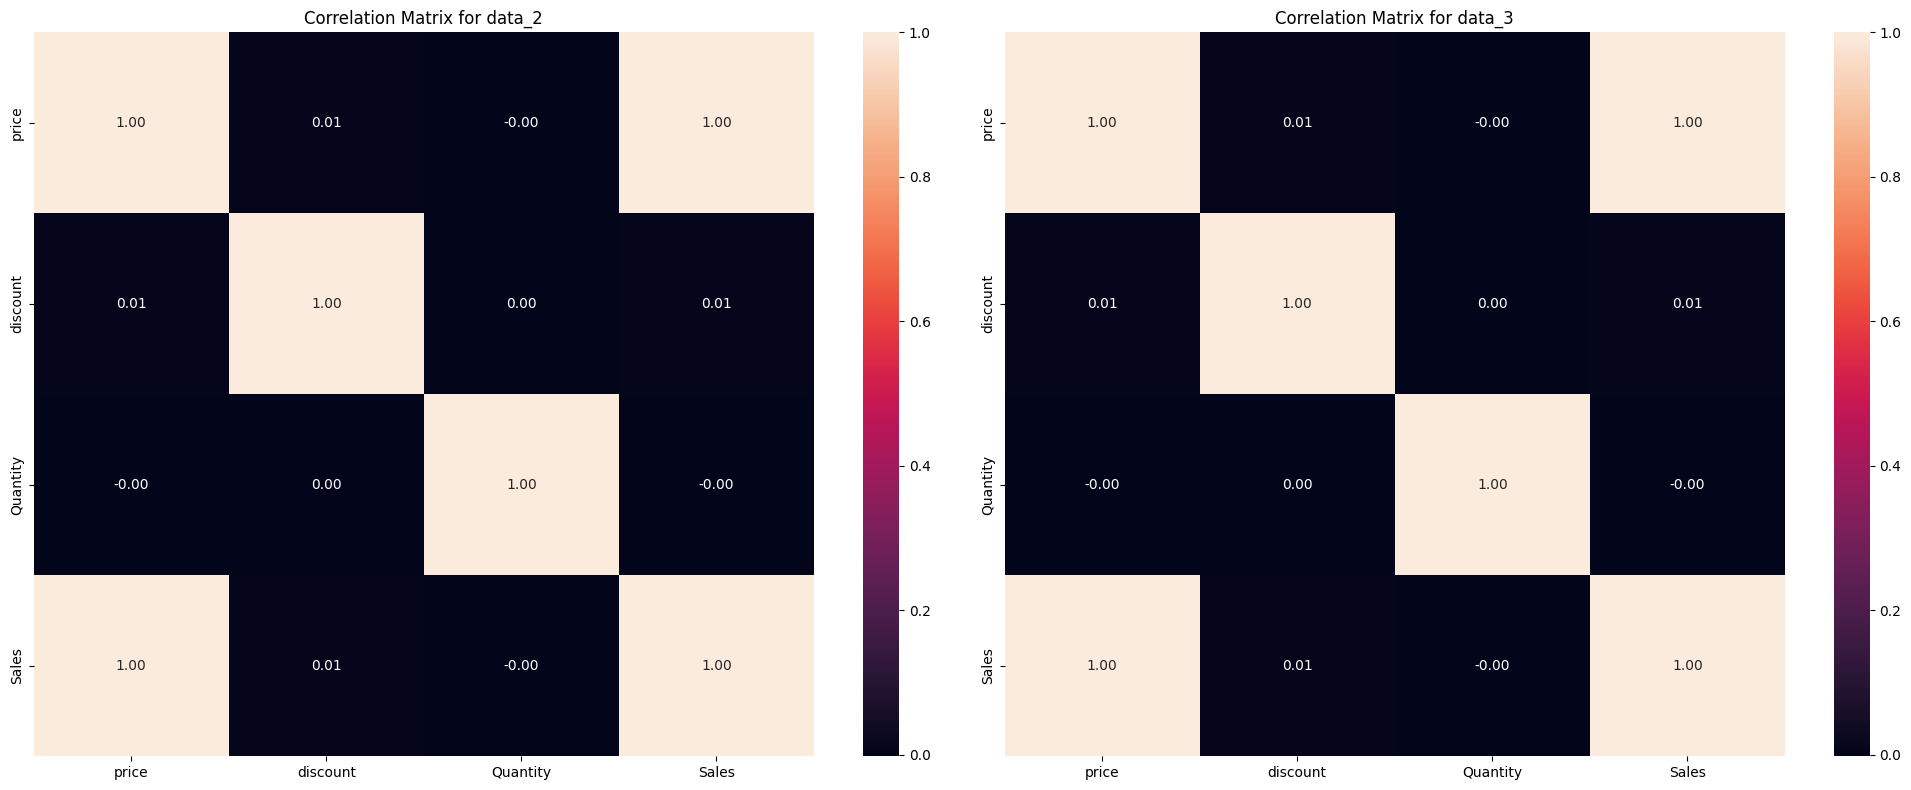

"For both datasets, the 'price' and 'Sales' are very strongly positively\n correlated (almost +1 in both cases). This indicates that as the\n   price increases, the sales also tend to increase."

In [4]:
# Correlation Analysis for data_2 and data_3
corr_matrix_2 = data_2.corr(numeric_only=True)
print(corr_matrix_2)

corr_matrix_3 = data_3.corr(numeric_only=True)
print(corr_matrix_3)

# Define the size of the entire plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Visualizing the correlation matrix using a heatmap
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix for data_2")

sns.heatmap(corr_matrix_3, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix for data_3")

plt.tight_layout()
plt.show()


'''For both datasets, the 'price' and 'Sales' are very strongly positively
 correlated (almost +1 in both cases). This indicates that as the
   price increases, the sales also tend to increase.'''

<Axes: xlabel='price', ylabel='Sales'>

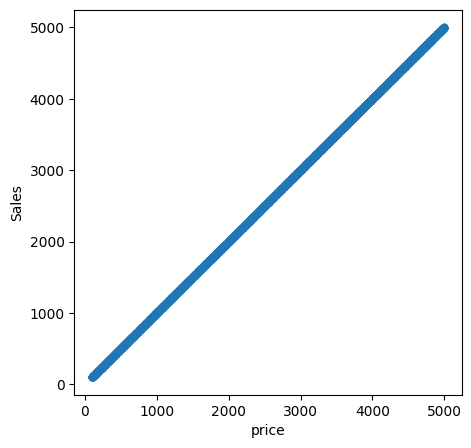

In [5]:
data_2.plot.scatter(x='price', y='Sales', figsize=(5, 5))

# Apply ARIMA model on Data Set 02

In [6]:
data_2 = pd.read_csv('2nd_dataset.csv', index_col=0)
data_2

,price,brand,discount,color,department,Quantity,Sales
0,2537.911471,H&M,0.088529,#e2a885,kids,3.0,2540.911471
1,2715.912938,H&M,0.087062,#dbb41a,women,1.0,2716.912938
2,4423.894382,Fendi,0.105618,#7de09c,kids,3.0,4426.894382
3,4326.941861,H&M,0.058139,#34b7db,girl,1.0,4327.941861
4,3269.926153,Lululemon,0.073847,#f4a7a1,kids,3.0,3272.926153
...,...,...,...,...,...,...,...
9995,4429.944676,H&M,0.055324,#132093,men,2.0,4431.944676
9996,659.922586,Lululemon,0.077414,#0624a8,men,2.0,661.922586
9997,3566.927314,Louis vuitton,0.072686,#f202aa,women,1.0,3567.927314
9998,805.849399,Fendi,0.150601,#fcf285,boys,2.0,807.849399


In [7]:
import pandas as pd

def sum_by_item(data, column_name, item):
    data_filtered = data[data[column_name] == item]
    data_yearly = data_filtered.groupby(data_filtered.index.year).agg({'Sales': 'sum', 'price': 'sum', 'discount': 'sum', 'Quantity': 'sum'})
    data_yearly.rename(columns={'price': 'Total Price', 'discount': 'Total Discount'}, inplace=True)
    data_yearly.index.name = 'Year'
    data_yearly.reset_index(inplace=True)
    return data_yearly

data_2 = pd.read_csv('2nd_dataset.csv', index_col=0)

# Generate random dates
date_range = pd.date_range(start='1960-01-01', end='2022-12-31')
data_2['Date'] = np.random.choice(date_range, size=len(data_2))

# Set the 'Date' column as the index
data_2.set_index('Date', inplace=True)

# Calculate the sum of specific columns for a specific brand
brand_data = sum_by_item(data_2, 'brand', 'H&M')
print("Sum of Sales, Price, Discount, and Quantity for Brand X by Year:")
print(brand_data)

# Calculate the sum of specific columns for a specific color
department_data = sum_by_item(data_2, 'department', 'women')
print("Sum of Sales, Price, Discount, and department for X Color by Year:")
print(department_data)


Sum of Sales, Price, Discount, and Quantity for Brand X by Year:
    Year         Sales   Total Price  Total Discount  Quantity
0   1960  53700.469852  53659.469852        1.530148      41.0
1   1961  46957.388688  46917.388688        1.611312      40.0
2   1962  53424.591499  53386.591499        1.408501      38.0
3   1963  51906.796614  51869.796614        1.203386      37.0
4   1964  53879.535718  53846.535718        1.464282      33.0
..   ...           ...           ...             ...       ...
58  2018  66799.877095  66752.877095        2.122905      47.0
59  2019  41961.701530  41923.701530        1.298470      38.0
60  2020  45171.528142  45132.528142        1.471858      39.0
61  2021  45050.620654  45012.620654        1.379346      38.0
62  2022  31818.184267  31799.184267        0.815733      19.0

[63 rows x 5 columns]
Sum of Sales, Price, Discount, and department for X Color by Year:
    Year          Sales    Total Price  Total Discount  Quantity
0   1960   82927.872218 

In [8]:

import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Scatter(
    x=department_data['Year'],
    y=department_data['Sales'],
    name='Sales by Department',
    mode='lines'
)

trace2 = go.Scatter(
    x=brand_data['Year'],
    y=brand_data['Sales'],
    name='Sales by Brand',
    mode='lines'
)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Sales by Department', 'Sales by Brand'))
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_layout(
    title='Time Series Plot of Sales',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Sales'),
    grid=dict(rows=1, columns=2),
    height=600,
    width=1000
)

fig.show()


In [9]:
# convert data to a stationary

brand_data['Sales_diff'] = brand_data['Sales'].diff()
brand_data['Sales_diff_log'] = np.log(brand_data['Sales_diff'])
brand_data.dropna(inplace=True)

from statsmodels.tsa.stattools import adfuller

result = adfuller(brand_data['Sales_diff_log'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -4.408719361578943
p-value: 0.0002864615281778959


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



In [10]:
data_1=brand_data.copy()

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Filter out the warnings
warnings.filterwarnings("ignore")

# Assuming that your DataFrame is named data_1

# Compute the logarithm of Sales
data_1['Log_Sales'] = np.log(data_1['Sales'])

# Compute the differences of the logarithm of Sales
data_1['Sales_diff_log'] = data_1['Log_Sales'].diff().dropna()

# Convert the 'Sales_diff_log' column to a time series
sales_series = pd.Series(data_1['Sales_diff_log'].dropna())

# Fit the ARIMA model
# For simplicity, I'll use an ARIMA(1,1,1) model - in practice, you would need to find the best parameters
model = ARIMA(sales_series, order=(1, 0, 0))
model_fit = model.fit()

# Print out the summary of the fit model
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:         Sales_diff_log   No. Observations:                   28
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   0.685
Date:                Sat, 10 Jun 2023   AIC                              4.631
Time:                        03:12:40   BIC                              8.627
Sample:                             0   HQIC                             5.853
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.041     -0.103      0.918      -0.085       0.077
ar.L1         -0.1482      0.322     -0.460      0.645      -0.780       0.483
sigma2         0.0557      0.024      2.309      0.0

In [12]:
# Generate predictions
predictions = model_fit.predict()


# Reverse the transformations to get back to the original scale
def reverse_transformations(differences, original_log_sales):
    result = [original_log_sales.iloc[0]]
    for diff in differences:
        result.append(result[-1] + diff)
    return np.exp(result)

# Reverse the transformations on the original data
original_sales = reverse_transformations(data_1['Sales_diff_log'].dropna(), data_1['Log_Sales'])

# Reverse the transformations on the predictions
predicted_sales = reverse_transformations(predictions, data_1['Log_Sales'])

# Create a plotly graph
fig = go.Figure()

# Add actual values to the graph
fig.add_trace(go.Scatter(x=data_1['Year'], y=original_sales, mode='lines', name='Actual'))

# Add predicted values to the graph
fig.add_trace(go.Scatter(x=data_1['Year'][1:], y=predicted_sales[1:], mode='lines', name='Predicted'))

# Add labels and title
fig.update_layout(title='Actual vs Predicted Sales', xaxis_title='Year', yaxis_title='Sales')

# Show the graph
fig.show()



# Data Set 3

In [13]:
data_3 = pd.read_csv('3rd_dataset.csv', index_col=0)
data_3

,price,brand,discount,color,department,Quantity,Sales
0,17.746123,H&M,0.088529,#e2a885,kids,3.0,14.145269
1,2.417617,H&M,0.087062,#dbb41a,women,1.0,23.351254
2,15.137210,Fendi,0.105618,#7de09c,kids,3.0,3.368582
3,53.959367,H&M,0.058139,#34b7db,girl,1.0,39.133539
4,1.390840,Lululemon,0.073847,#f4a7a1,kids,3.0,80.387431
...,...,...,...,...,...,...,...
9995,4429.944676,H&M,0.055324,#132093,men,2.0,4431.944676
9996,659.922586,Lululemon,0.077414,#0624a8,men,2.0,661.922586
9997,3566.927314,Louis vuitton,0.072686,#f202aa,women,1.0,3567.927314
9998,805.849399,Fendi,0.150601,#fcf285,boys,2.0,807.849399


In [14]:
import pandas as pd

def sum_by_item(data, column_name, item):
    data_filtered = data[data[column_name] == item]
    data_yearly = data_filtered.groupby(data_filtered.index.year).agg({'Sales': 'sum', 'price': 'sum', 'discount': 'sum', 'Quantity': 'sum'})
    data_yearly.rename(columns={'price': 'Total Price', 'discount': 'Total Discount'}, inplace=True)
    data_yearly.index.name = 'Year'
    data_yearly.reset_index(inplace=True)
    return data_yearly

data_3 = pd.read_csv('3rd_dataset.csv', index_col=0)

# Generate random dates
date_range = pd.date_range(start='1960-01-01', end='2022-12-31')
data_3['Date'] = np.random.choice(date_range, size=len(data_3))

# Set the 'Date' column as the index
data_3.set_index('Date', inplace=True)

# Calculate the sum of specific columns for a specific brand
brand_data = sum_by_item(data_3, 'brand', 'H&M')
print("Sum of Sales, Price, Discount, and Quantity for Brand X by Year:")
print(brand_data)

# Calculate the sum of specific columns for a specific color
department_data = sum_by_item(data_3, 'department', 'women')
print("Sum of Sales, Price, Discount, and department for X Color by Year:")
print(department_data)


Sum of Sales, Price, Discount, and Quantity for Brand X by Year:
    Year         Sales   Total Price  Total Discount  Quantity
0   1960  30108.899338  30079.899338        1.100662      29.0
1   1961  40744.527632  40708.527632        1.472368      36.0
2   1962  55600.422130  55556.422130        1.577870      44.0
3   1963  34576.032510  34543.032510        0.967490      33.0
4   1964  44201.401438  44163.401438        1.598562      38.0
..   ...           ...           ...             ...       ...
58  2018  47335.587515  47297.587515        1.412485      38.0
59  2019  24331.259982  24312.259982        0.740018      19.0
60  2020  19542.194274  19519.194274        0.805726      23.0
61  2021  17403.404228  17397.230055        0.787450      22.0
62  2022  42255.692569  42223.692569        1.307431      32.0

[63 rows x 5 columns]
Sum of Sales, Price, Discount, and department for X Color by Year:
    Year         Sales   Total Price  Total Discount  Quantity
0   1960  73425.075399  73

In [15]:
trace1 = go.Scatter(
    x=department_data['Year'],
    y=department_data['Sales'],
    name='Sales by Department',
    mode='lines'
)

trace2 = go.Scatter(
    x=brand_data['Year'],
    y=brand_data['Sales'],
    name='Sales by Brand',
    mode='lines'
)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Sales by Department', 'Sales by Brand'))
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_layout(
    title='Time Series Plot of Sales',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Sales'),
    grid=dict(rows=1, columns=2),
    height=600,
    width=1000
)

fig.show()


In [16]:
# convert data to a stationary

brand_data['Sales_diff'] = brand_data['Sales'].diff()
brand_data['Sales_diff_log'] = np.log(brand_data['Sales_diff'])
brand_data.dropna(inplace=True)

from statsmodels.tsa.stattools import adfuller

result = adfuller(brand_data['Sales_diff_log'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.594180647204238
p-value: 0.09420598408122477


In [17]:
data_3=brand_data.copy()

In [18]:
# Filter out the warnings
warnings.filterwarnings("ignore")

# Assuming that your DataFrame is named data_1

# Compute the logarithm of Sales
data_1['Log_Sales'] = np.log(data_1['Sales'])

# Compute the differences of the logarithm of Sales
data_1['Sales_diff_log'] = data_1['Log_Sales'].diff().dropna()

# Convert the 'Sales_diff_log' column to a time series
sales_series = pd.Series(data_1['Sales_diff_log'].dropna())

# Fit the ARIMA model
# For simplicity, I'll use an ARIMA(1,1,1) model - in practice, you would need to find the best parameters
model = ARIMA(sales_series, order=(1, 0, 0))
model_fit = model.fit()

# Print out the summary of the fit model
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:         Sales_diff_log   No. Observations:                   28
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   0.685
Date:                Sat, 10 Jun 2023   AIC                              4.631
Time:                        03:12:43   BIC                              8.627
Sample:                             0   HQIC                             5.853
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.041     -0.103      0.918      -0.085       0.077
ar.L1         -0.1482      0.322     -0.460      0.645      -0.780       0.483
sigma2         0.0557      0.024      2.309      0.0

In [19]:
# Generate predictions
predictions = model_fit.predict()


# Reverse the transformations to get back to the original scale
def reverse_transformations(differences, original_log_sales):
    result = [original_log_sales.iloc[0]]
    for diff in differences:
        result.append(result[-1] + diff)
    return np.exp(result)

# Reverse the transformations on the original data
original_sales = reverse_transformations(data_1['Sales_diff_log'].dropna(), data_1['Log_Sales'])

# Reverse the transformations on the predictions
predicted_sales = reverse_transformations(predictions, data_1['Log_Sales'])

# Create a plotly graph
fig = go.Figure()

# Add actual values to the graph
fig.add_trace(go.Scatter(x=data_1['Year'], y=original_sales, mode='lines', name='Actual'))

# Add predicted values to the graph
fig.add_trace(go.Scatter(x=data_1['Year'][1:], y=predicted_sales[1:], mode='lines', name='Predicted'))

# Add labels and title
fig.update_layout(title='Actual vs Predicted Sales', xaxis_title='Year', yaxis_title='Sales')

# Show the graph
fig.show()

